# ** PROJET 2 - Analyse des données de systèmes éducatifs **

Logo

> **Academy**, startup proposant des cours en ligne, a le projet de se développer à l'international.
Il nous confie la mission d'analyse exploratoire pour savoir si les données de la Banque Mondiale permettent de valider le projet d'expansion.  
Source: [Banque Mondiale de données](https://datacatalog.worldbank.org/search/dataset/0038480)

In [1]:
# Installation du packahe Missingno pour le graphique de complétude des données

! pip install missingno

In [3]:
# Importation des diverses librairies qui pourraient nous être utiles

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
pd.set_option('display.max_row', 70)
pd.set_option('display.max_column', 70)

# Analyse de la forme des données

>**EdStatsCountry.csv**
>Contient tous les données sur les pays, d'un point de vue géographique et économique

In [24]:
# Importation du fichier qui nous permet de récupérer les groupes de pays par revenus et par régions

stats_country = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry.csv")
stats_country.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [5]:
stats_country.shape

(241, 32)

In [6]:
print(f"EdStatsCountry contient {stats_country.shape[0]} lignes et {stats_country.shape[1]} colonnes")

EdStatsCountry contient 241 lignes et 32 colonnes


In [7]:
stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

<AxesSubplot:>

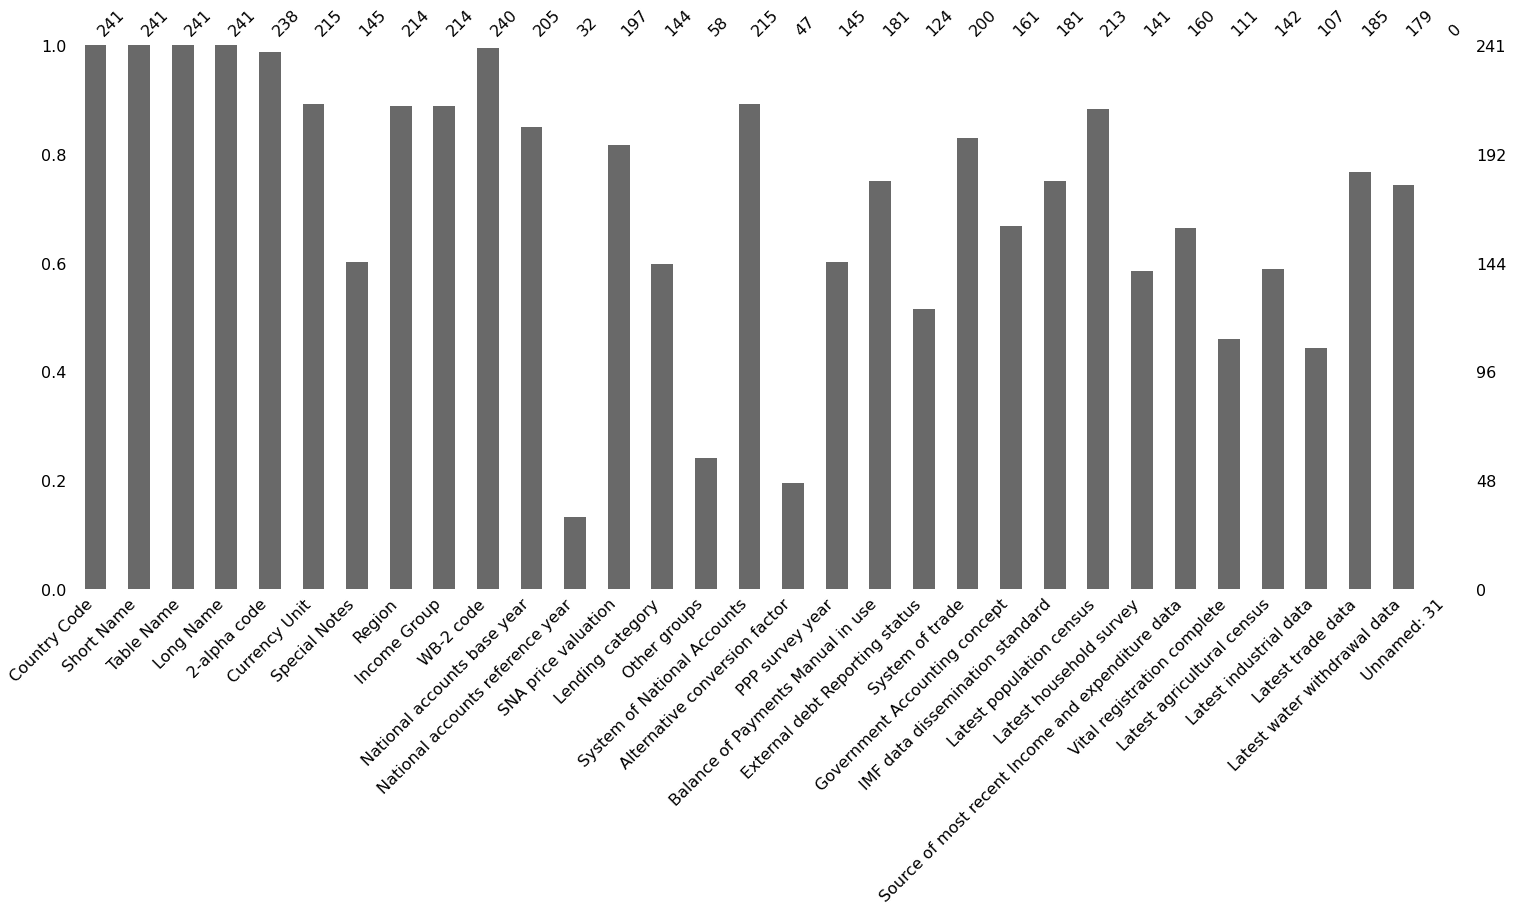

In [9]:
msno.bar(stats_country.sample(241))

In [34]:
# Vérifier qu'il n'y a pas de doublon dans la colonne "Country Code" qui représente l'ensemble des pays

stats_country.duplicated('Country Code', keep='first').sum()

0

In [42]:
stats_country.groupby('Region')['Country Code'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country Code, dtype: int64

---

>**EdStatsCountry-Series.csv**
> Il contient les sources des études

In [10]:
# Importation du fichier EdStatsCountry-Series

stats_country_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry-Series.csv")
stats_country_series.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [11]:
stats_country_series.shape

(613, 4)

In [12]:
print(f"EdStatsCountry-Series contient {stats_country_series.shape[0]} lignes et {stats_country_series.shape[1]} colonnes")

EdStatsCountry-Series contient 613 lignes et 4 colonnes


In [13]:
stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [14]:
# % de données absentes par années, triées par ordre croissant

(stats_country_series.isna().sum()/stats_country_series.shape[0]*100).sort_values(ascending=True)

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

<AxesSubplot:>

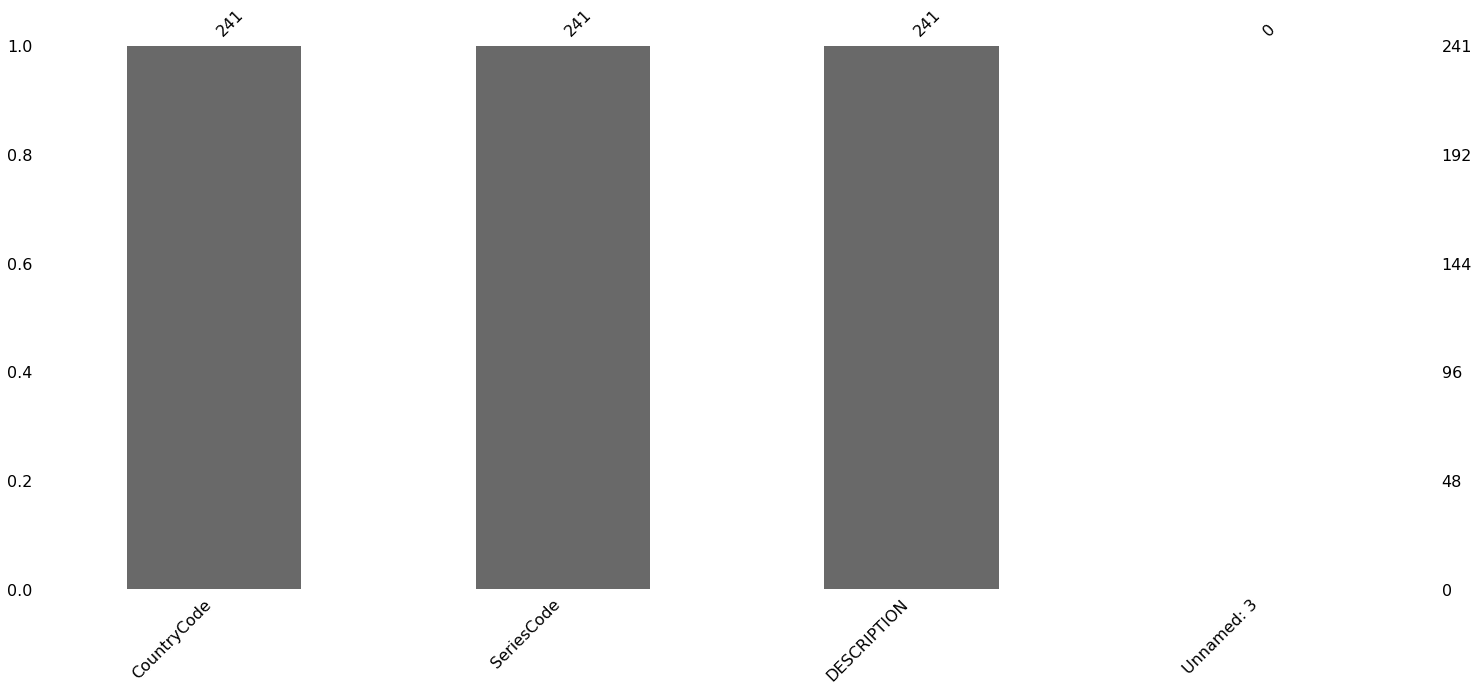

In [15]:
msno.bar(stats_country_series.sample(241))

---

>**EdStatsData.csv**
>Contient les indicateurs des études des systèmes éducatifs, par pays et par année, de 1970 à 2100.

In [18]:
# Importation du fichier "EdStatsData.csv" qui contient les indicateurs

stats_data = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsData.csv")
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
stats_data.shape

(886930, 70)

In [18]:
print(f"EdStatsData contient {stats_data.shape[0]} lignes et {stats_data.shape[1]} colonnes")

EdStatsData contient 886930 lignes et 70 colonnes


In [19]:
stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [20]:
# % de données absentes par années, triées par ordre croissant

(stats_data.isna().sum()/stats_data.shape[0]*100).sort_values(ascending=True)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
2010               72.665036
2005               79.242105
2000               80.080051
2012               83.396209
2011               83.537370
2009               83.977541
2006               84.180037
2013               84.496071
2007               84.522792
2008               84.848071
1995               85.189248
2015               85.223411
2003               85.301771
2004               85.476419
1990               85.973527
2002               85.996076
2001               86.074549
1999               86.601085
2014               87.170464
1985               89.819264
1980               89.951631
1975               90.156382
1998               90.426076
1994               91.266278
1996               91.340128
1993               91.454455
1992               91.482642
1991               91.607342
1997               91.718287
1970               91.849639
2040          

<AxesSubplot:>

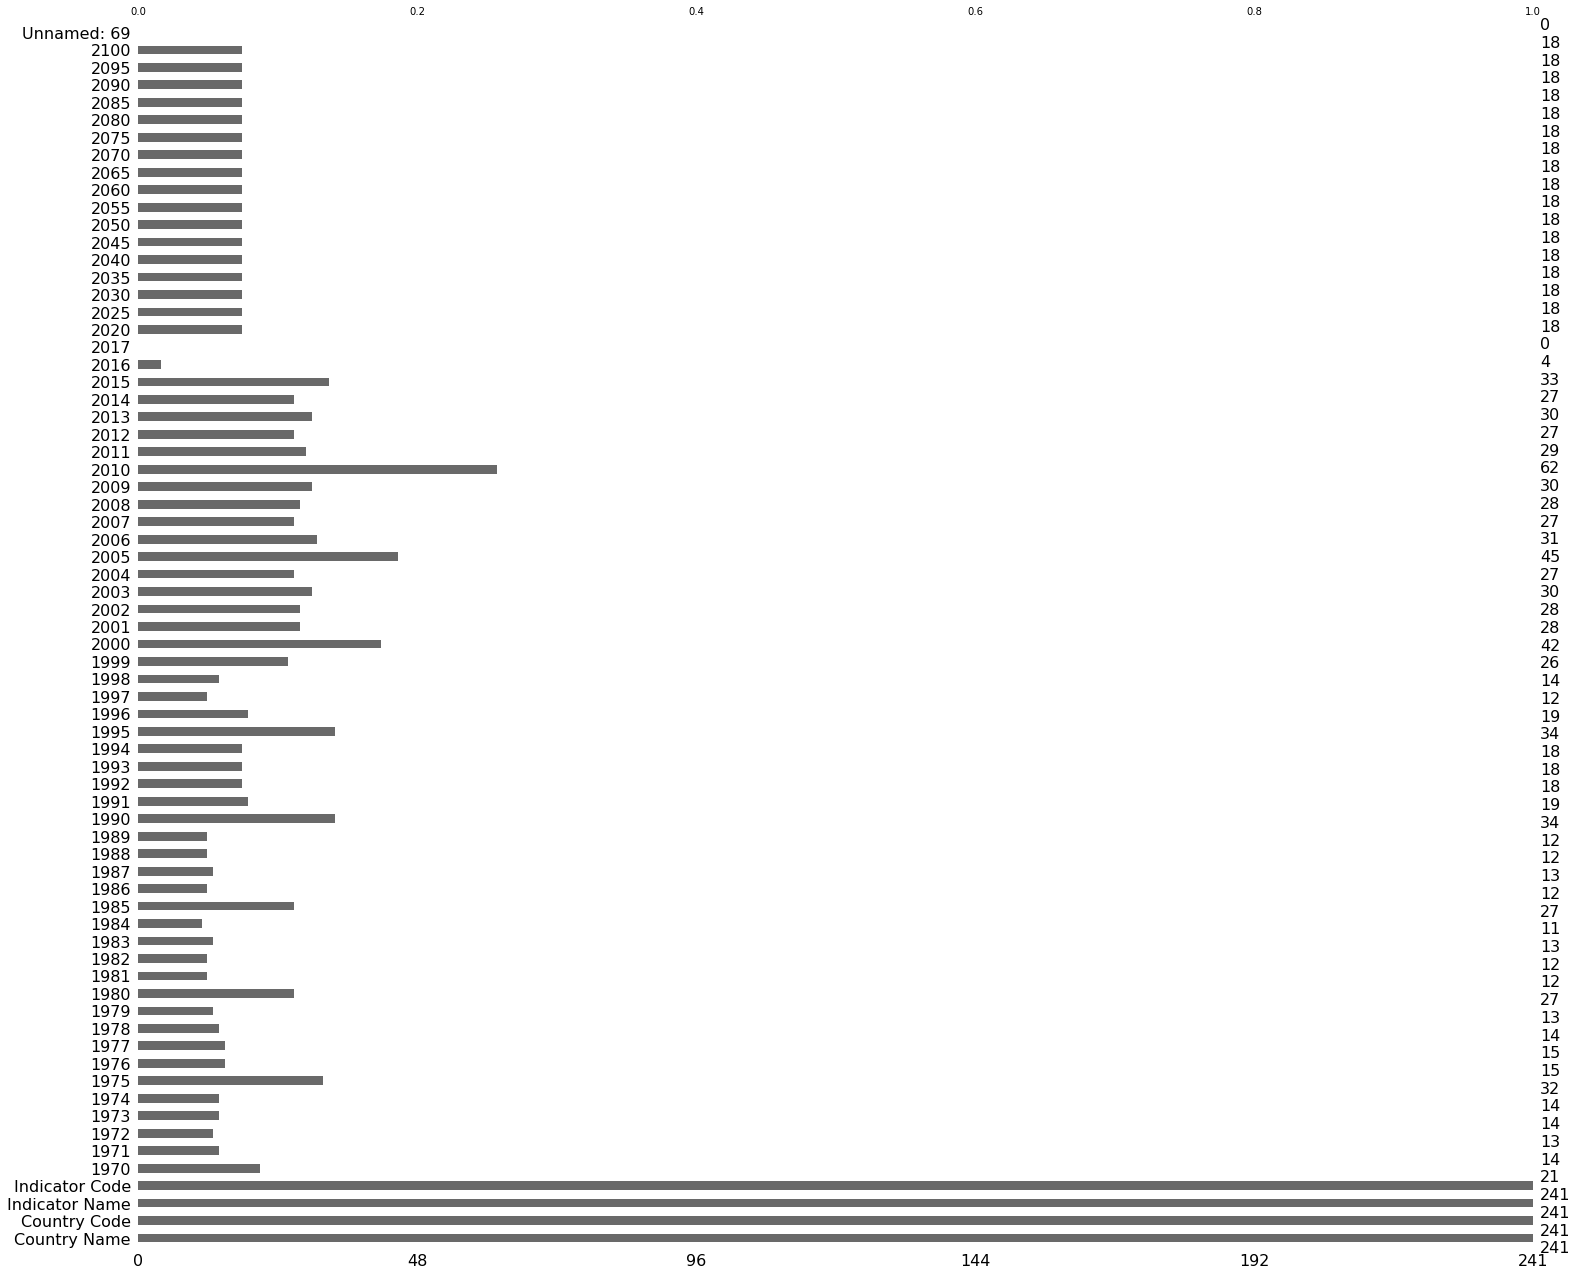

In [21]:
msno.bar(stats_data.sample(241))

Ce jeu de donnée représentera la base de notre analyse

---

>**EdStatsFootNote.csv**
> Il contient des informations sur les codes et les dates des indicateurs 

In [4]:
# Importation du fichier EdStatsFootNote

stats_foot_note = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsFootNote.csv")
stats_foot_note.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [5]:
stats_foot_note.shape

(643638, 5)

In [6]:
print(f"EdStatsFootNote contient {stats_foot_note.shape[0]} lignes et {stats_foot_note.shape[1]} colonnes")

EdStatsFootNote contient 643638 lignes et 5 colonnes


In [7]:
stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [8]:
# % de données absentes par années, triées par ordre croissant

(stats_foot_note.isna().sum()/stats_foot_note.shape[0]*100).sort_values(ascending=True)

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

<AxesSubplot:>

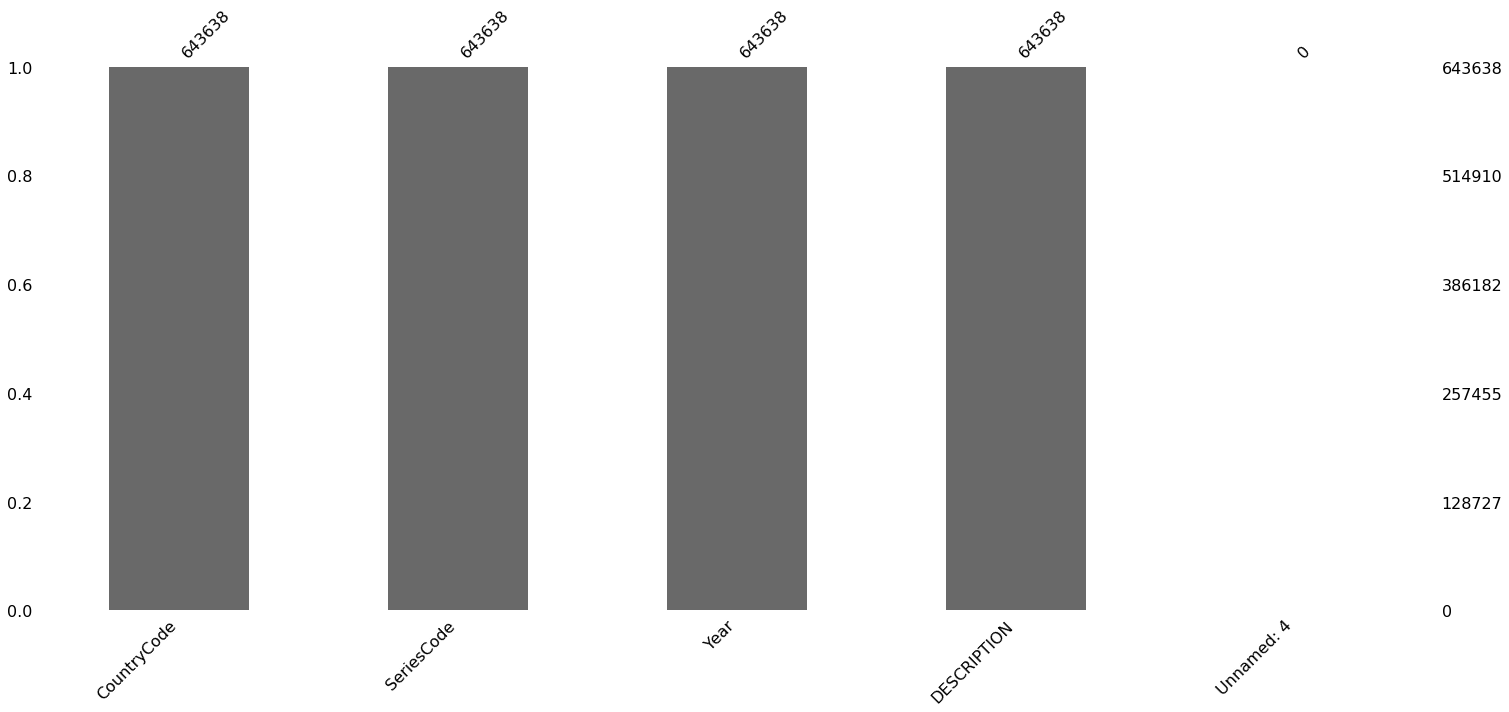

In [9]:
msno.bar(stats_foot_note.sample(643638))

---

>**EdSstatsSeries.csv**
> Il contient des informations sur la définition des indicateurs.

In [10]:
# Importation du fichier EdSstatsSeries

stats_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsSeries.csv")
stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
stats_series.shape

(3665, 21)

In [12]:
print(f"EdSstatsSeries contient {stats_series.shape[0]} lignes et {stats_series.shape[1]} colonnes")

EdSstatsSeries contient 3665 lignes et 21 colonnes


In [13]:
stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<AxesSubplot:>

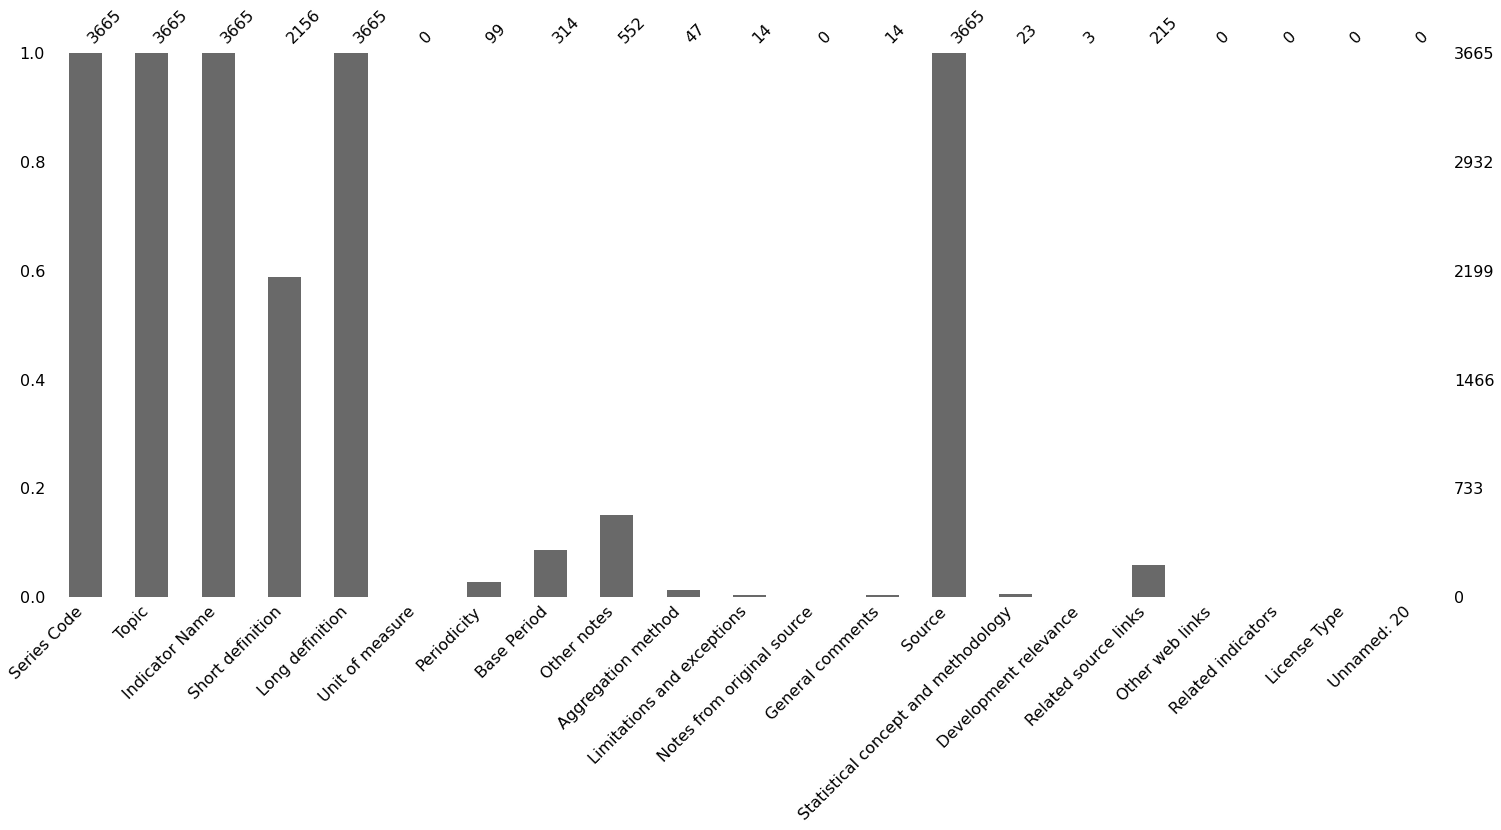

In [14]:
msno.bar(stats_series.sample(3665))

---

# Analyse de fond: choix des indictateurs

Il me parait judicieux de pouvoir se rendre compte du nombre de la population des pays étudiés. En effet, préconiser un développement sur un pays avec peu d'habitants ne serait pas judicieux.  

**Méthode appliquée:**  
- L'indicateur *'population totale'* se trouve dans le dataframe EdStatsData.csv
- Vérification que les pays sont uniques, qu'il n'y a pas de doublon
- Vérification de la complétude des données par années
- Complétude des données manquantes par les dernières données les plus récentes
- Seuils minimal et maximal de population que nous souhaitons prende en compte
- Visualisation des pays ayant le plus de population

In [56]:
indicateurs = (
    'Population, total', 
    'Enrolment in secondary education, both sexes (number)',
    'Expenditure on secondary as % of government expenditure on education (%)', 
    'Internet users (per 100 people)'
)

In [57]:
df_fusion = pd.merge(stats_country[['Region','Income Group', 'Country Code']],stats_data, how='inner', on='Country Code')
df_fusion = df_fusion.rename(columns = {'Unnamed: 69':'Dernieres_Donnees_Dispo'})
df_fusion

,Region,Income Group,Country Code,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Dernieres_Donnees_Dispo
0,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883260,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883261,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883262,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883263,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_indic = df_fusion[df_fusion['Indicator Name'].isin(indicateurs)]
df_indic.reset_index(drop = True, inplace = True)
df_indic

,Region,Income Group,Country Code,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Dernieres_Donnees_Dispo
0,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"Population, total",SP.POP.TOTL,59063.0,59440.0,59840.0,60243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South Asia,Low income,AFG,Afghanistan,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,116174.0,134069.0,153060.0,165346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Sub-Saharan Africa,Lower middle income,ZMB,Zambia,"Population, total",SP.POP.TOTL,4173928.0,4317748.0,4469895.0,4629402.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,49845.0,53324.0,59556.0,63116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_indic['Dernieres_Donnees_Dispo'] = df_indic.fillna(method ='ffill', axis = 1) 

ValueError: Columns must be same length as key

In [20]:
stats_data_drop = stats_data.drop(list(stats_data.filter(regex="^[-+]?[0-9]+$").columns), axis=1)
stats_data_drop

,Country Name,Country Code,Indicator Name,Indicator Code,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN
